# Assignment 6: Pandas Groupby with Hurricane Data
Aandishah Tehzeeb Samara
<p> 18th October 2022
<p>Collaborators: Ibuki Sigura, Jerry, Yuwei Zhao

In [ ]:
#Import Numpy, Pandas and Matplotlib and set the display options.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Use the following code to load a CSV file of the NOAA IBTrACS hurricane dataset:

url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

How many North Atlantic hurricanes are in this dataset?

## Q1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns

In [ ]:
basin = df.BASIN.unique()
subbasin = df.SUBBASIN.unique()
nature = df.NATURE.unique()
print("Unique Basin =", basin)
print("Unique Subbasin =", subbasin)
print("Unique Nature =", nature)

## Q2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES

In [ ]:
df.columns = df.columns.str.replace('WMO_WIND', 'WIND')
df.columns = df.columns.str.replace('WMO_PRES', 'PRES')
df

## Q3) Get the 10 largest rows in the dataset by WIND
You will notice some names are repeated.

In [ ]:
n10 = df.nlargest(10, 'WIND')
n10

## Q4) Group the data on SID and get the 10 largest hurricanes by WIND

In [ ]:
Wind_10 = df.groupby('SID').WIND.max().nlargest(10)
Wind_10

## 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes
Use the name on the x-axis.

In [ ]:
Wind_20 = df.groupby('NAME').WIND.max().nlargest(20).plot(kind = 'bar')
plt.xlabel("Hurricane Name")
plt.title("Top 20 Hurricanes by Wind")
plt.show()

## 6) Plot the count of all datapoints by Basin as a bar chart

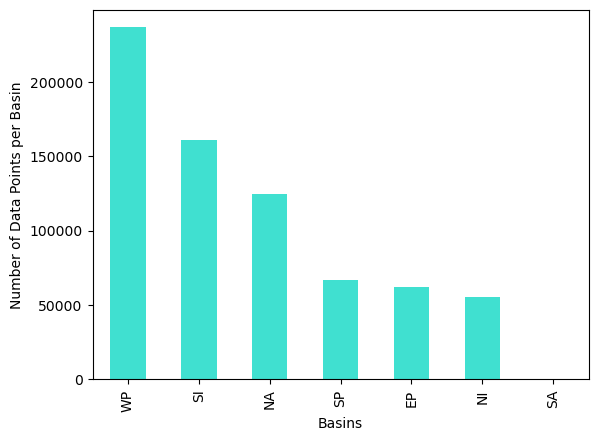

In [18]:
n_basin = df['BASIN'].value_counts()[:].plot(kind='bar', color='turquoise')
plt.ylabel('Number of Data Points per Basin')
plt.xlabel('Basins')
plt.show()

#df['BASIN'].SID.counts().plot(kind='bar')

## 7) Plot the count of unique hurricanes by Basin as a bar chart.

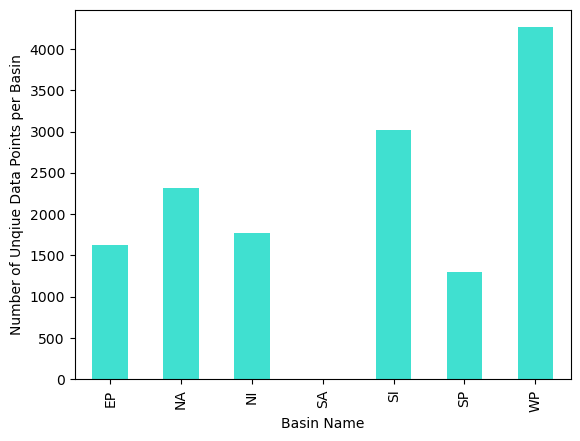

In [19]:
unique_basin = df.groupby("BASIN").SID.agg(lambda x:len(x.unique())).plot(kind="bar", color='turquoise')
plt.ylabel('Number of Unqiue Data Points per Basin')
plt.xlabel('Basin Name')
plt.show()


#Alternative Method
#df.groupby('BASIN').SID.nunique().plot(kind = 'bar')

## 8) Make a hexbin of the location of datapoints in Latitude and Longitude

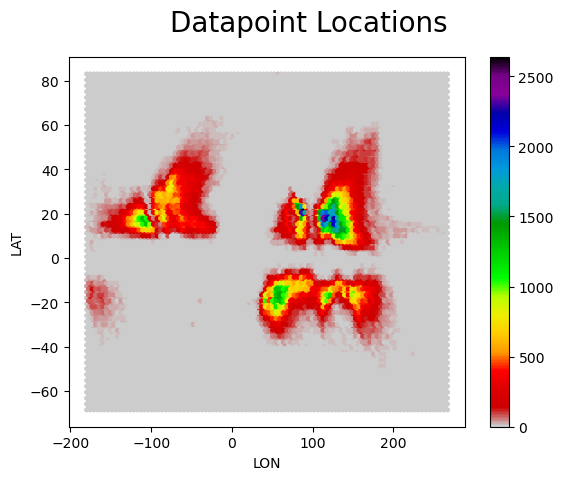

In [20]:
hexbin = df.plot.hexbin(x='LON', y='LAT',  gridsize = 100, cmap = "nipy_spectral_r")
#plt.colorbar(hexbin)
plt.suptitle('Datapoint Locations', fontsize = 20)
#Change color bar label 
plt.show()

## 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot
First find the SID of this hurricane.
Next get this hurricane’s group and plot its position as a scatter plot. Use wind speed to color the points.


Hurricane Katrina (from 2005) SID = ['2005236N23285']


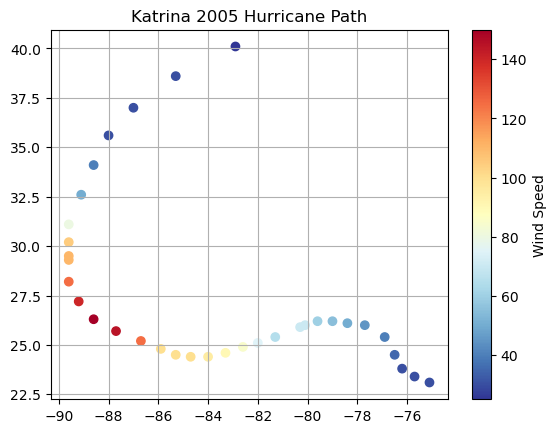

In [21]:
# Finding the Katrina 2005 Hurricane
kat_sid = df[(df.NAME=='KATRINA') & (df.SEASON==2005)].SID.unique()
print("Hurricane Katrina (from 2005) SID =", kat_sid)
kat05 = df[df.SID=='2005236N23285']

#Plotting Figure
kat05plt = plt.scatter(x = kat05['LON'], y = kat05['LAT'], c = kat05['WIND'], cmap = 'RdYlBu_r')
plt.colorbar(kat05plt, label = "Wind Speed")
plt.title('Katrina 2005 Hurricane Path')
plt.grid()
plt.show()

## 10) Make time the index on your dataframe

In [22]:
df_t = df.set_index('ISO_TIME')
df_t

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12 21:00:00,2022284N16268,2022,79,NA,GM,KARL,TS,22.2799,-94.3074,NaN,NaN
2022-10-13 00:00:00,2022284N16268,2022,79,NA,GM,KARL,TS,22.4000,-94.2333,NaN,NaN
2022-10-12 12:00:00,2022286N15151,2022,80,WP,MM,NaN,NR,15.2000,151.3000,NaN,NaN


## 11) Plot the count of all datapoints per year as a timeseries
You should use resample

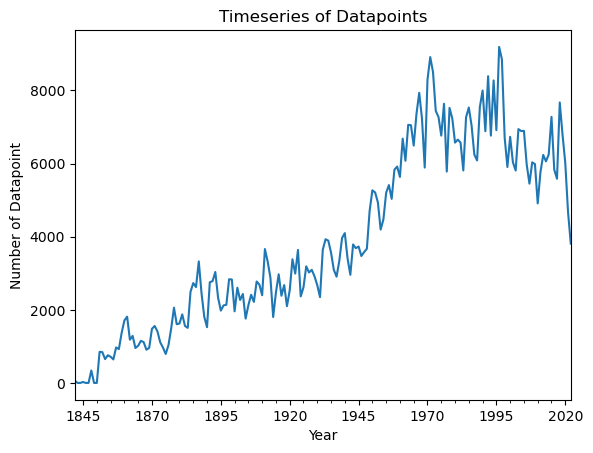

In [23]:
df_t.resample('Y').SID.count().plot()
plt.title("Timeseries of Datapoints")
plt.xlabel('Year')
plt.ylabel('Number of Datapoint')
plt.show()

## 12) Plot all tracks from the North Atlantic in 2005
You will probably have to iterate through a GroupBy object

In [24]:
NA_05 = df[(df.BASIN=='NA') & (df.SEASON==2005)]
NA_05

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
602041,2005160N17276,2005,31,NA,CS,ARLENE,2005-06-08 18:00:00,TS,16.9000,-84.0000,25.0,1004.0
602042,2005160N17276,2005,31,NA,CS,ARLENE,2005-06-08 21:00:00,TS,17.1200,-83.9425,NaN,NaN
602043,2005160N17276,2005,31,NA,CS,ARLENE,2005-06-09 00:00:00,TS,17.4000,-83.9000,30.0,1003.0
602044,2005160N17276,2005,31,NA,CS,ARLENE,2005-06-09 03:00:00,TS,17.7775,-83.8850,NaN,NaN
602045,2005160N17276,2005,31,NA,CS,ARLENE,2005-06-09 06:00:00,TS,18.2000,-83.9000,35.0,1003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
606894,2005364N24324,2005,115,NA,NA,ZETA,2006-01-07 06:00:00,DS,24.2000,-52.7000,25.0,1012.0
606895,2005364N24324,2005,115,NA,NA,ZETA,2006-01-07 09:00:00,DS,24.4249,-53.4364,NaN,NaN
606896,2005364N24324,2005,115,NA,NA,ZETA,2006-01-07 12:00:00,DS,24.8000,-54.2000,25.0,1014.0
606897,2005364N24324,2005,115,NA,NA,ZETA,2006-01-07 15:00:00,DS,25.4631,-54.9521,NaN,NaN


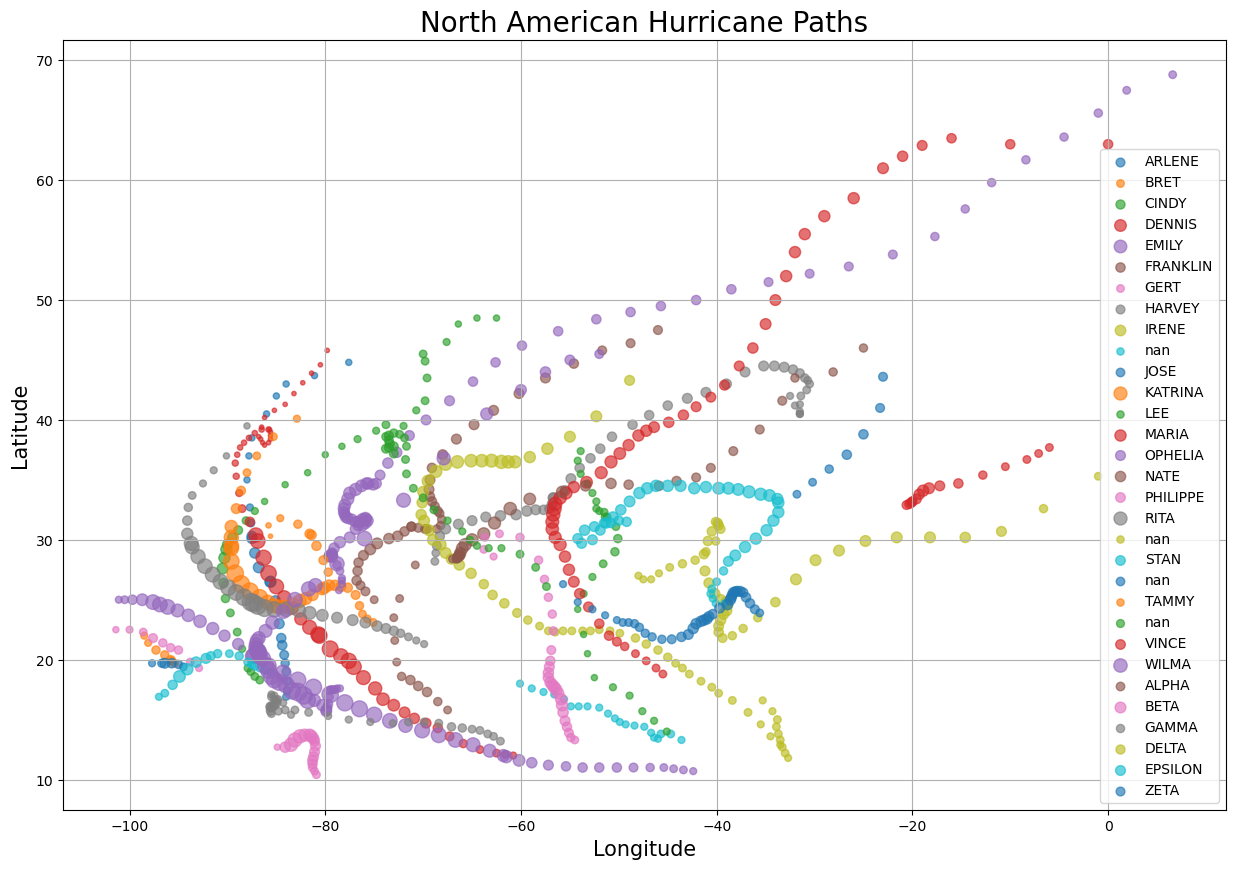

In [25]:
NA_05 = df[(df.BASIN=='NA') & (df.SEASON==2005)].groupby('SID')
plt.figure(figsize = (15, 10))
for name, group in NA_05:
    plt.scatter(group.LON, group.LAT, s = group.WIND, alpha = 0.65, label = group.NAME.unique()[0])
    plt.legend(fontsize = 10)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)
plt.title('North American Hurricane Paths', fontsize = 20)
plt.grid()
plt.show()

## 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin
Use this for the rest of the assignment

In [26]:
NA_70 = df_t[(df_t.BASIN=='NA') & (df_t.SEASON >= 1970)]
NA_70

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1970-05-17 18:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.5000,-79.0000,25.0,NaN
1970-05-17 21:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.6475,-79.1400,NaN,NaN
1970-05-18 00:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.8000,-79.3000,25.0,NaN
1970-05-18 03:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,11.9575,-79.4925,NaN,NaN
1970-05-18 06:00:00,1970138N12281,1970,43,NA,CS,ALMA,TS,12.1000,-79.7000,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-12 12:00:00,2022284N16268,2022,79,NA,GM,KARL,TS,21.5000,-94.8000,NaN,NaN
2022-10-12 15:00:00,2022284N16268,2022,79,NA,GM,KARL,TS,21.8226,-94.6319,NaN,NaN
2022-10-12 18:00:00,2022284N16268,2022,79,NA,GM,KARL,TS,22.1000,-94.4333,NaN,NaN


## 14) Plot the number of datapoints per day from this filtered dataframe
Make sure you figure is big enough to actually see the plot

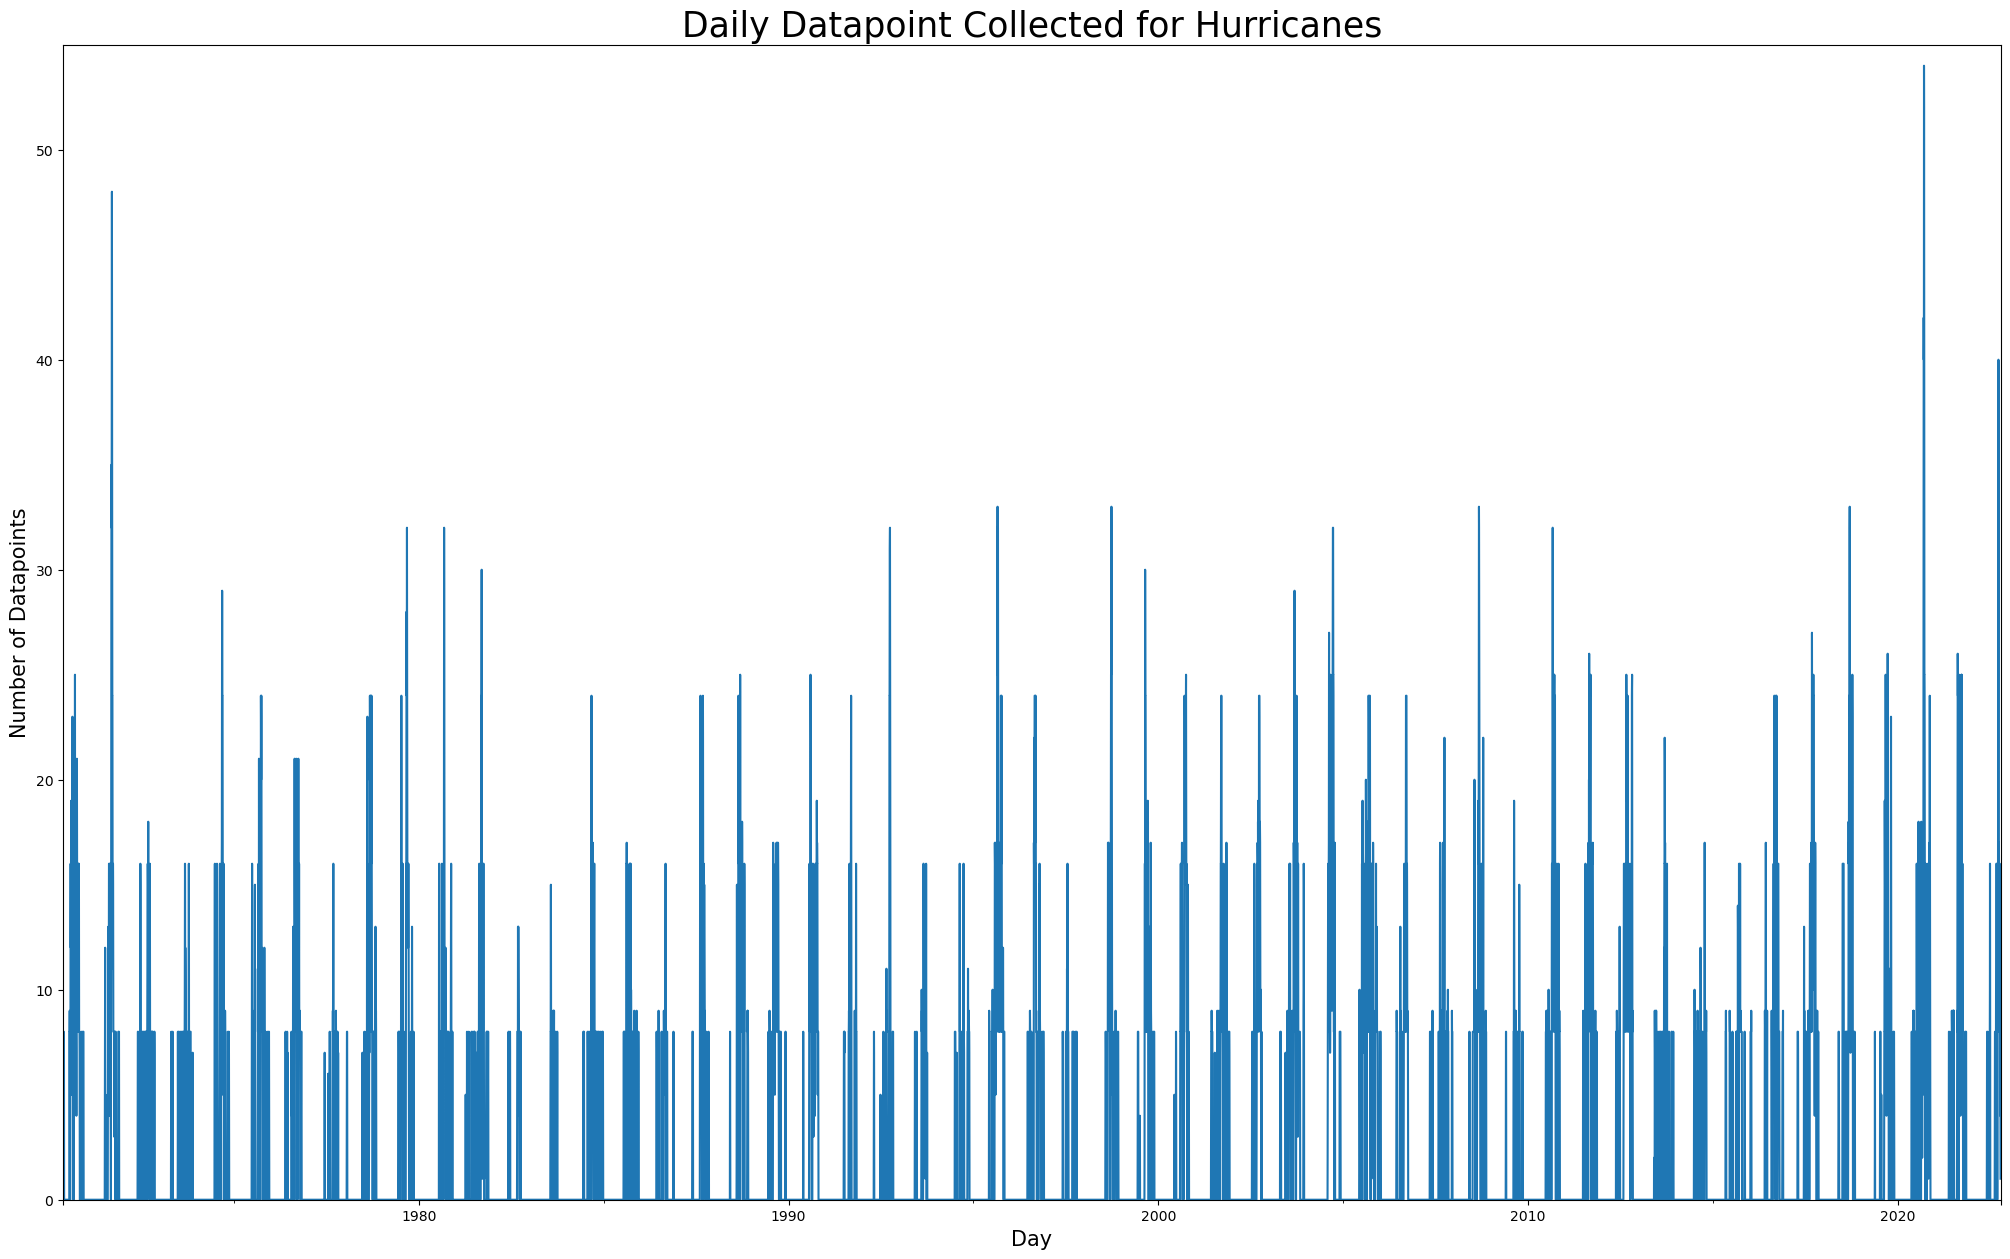

In [27]:
NA_Daily = NA_70.resample('D').SID.count()
NA_Daily.plot(figsize = (25, 15))
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Number of Datapoints', fontsize = 15)
plt.ylim(0, 55)
#plt.xticks(np.arange(0, 2022, 1))
plt.title('Daily Datapoint Collected for Hurricanes', fontsize = 25)
plt.show()

## 15) Calculate the climatology of datapoint counts as a function of dayofyear
Plot the mean and standard deviation on a single figure

In [28]:
NA_Daily

ISO_TIME
1970-05-17    2
1970-05-18    8
1970-05-19    8
1970-05-20    8
1970-05-21    8
             ..
2022-10-09    7
2022-10-10    4
2022-10-11    8
2022-10-12    8
2022-10-13    1
Freq: D, Name: SID, Length: 19143, dtype: int64

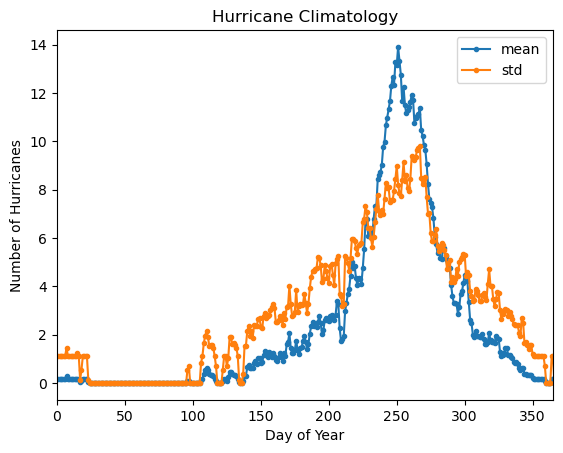

In [29]:
daily_climatology = NA_Daily.groupby(NA_Daily.index.dayofyear).aggregate(['mean', 'std'])
daily_climatology.plot(marker='.')
plt.xlabel('Day of Year')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricane Climatology')
plt.xlim(0, 365)
plt.show()

## 16) Use transform to calculate the anomaly of daily counts from the climatology
Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.
Which years stand out as having anomalous hurricane activity?

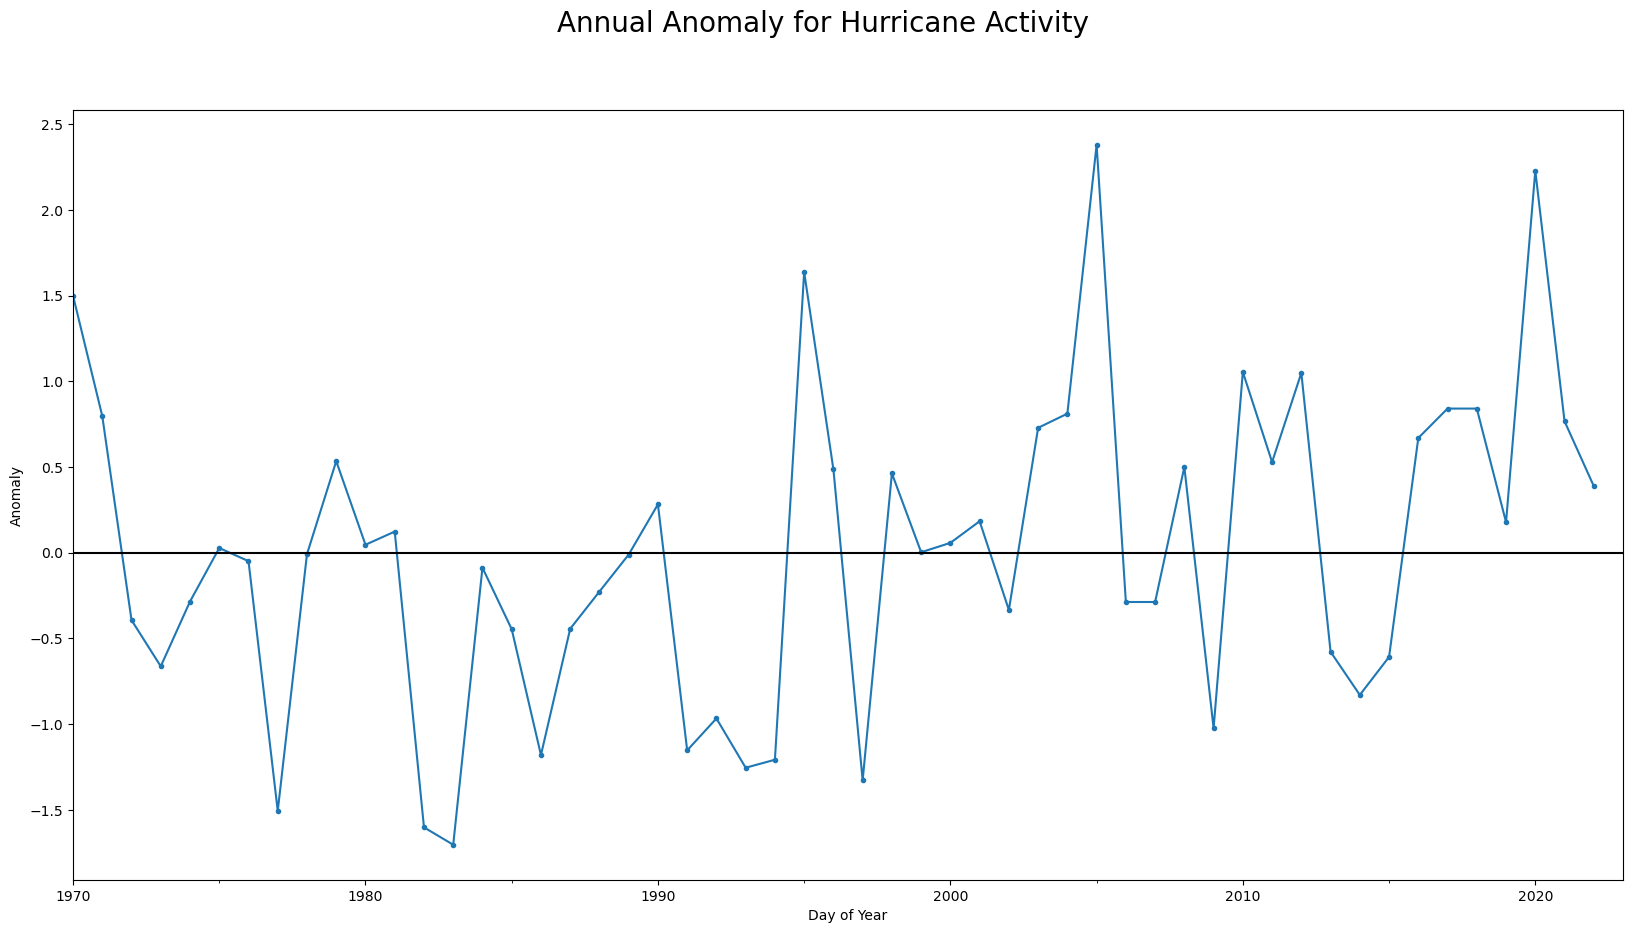

In [56]:
def standardize(x):
    return (x - x.mean())

anomaly = NA_Daily.groupby(NA_Daily.index.dayofyear).transform(standardize).resample('Y').mean()
ax = anomaly.plot(figsize = (20, 10), marker = '.')
plt.axhline(y = 0, c = 'k')
plt.xlabel('Day of Year')
plt.xlim('1970', '2023')
plt.ylabel('Anomaly')
plt.suptitle('Annual Anomaly for Hurricane Activity', fontsize = 20)
plt.show()

In [63]:
largest_anomaly = NA_Daily.groupby(NA_Daily.index.dayofyear).transform(standardize).resample('Y').mean().nlargest(5).sort_values()
print("Years with largest Anomalies =", largest_anomaly)
#printanomaly_10 = largest_anomaly.nlargest(10).sort_values()

Years with largest Anomalies = ISO_TIME
2010-12-31    1.054658
1970-12-31    1.499699
1995-12-31    1.638220
2020-12-31    2.229372
2005-12-31    2.380686
Name: SID, dtype: float64
